# Problem Statement and Data Description

### Chennai House Price Prediction (Regression)

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called "Chennai Estate Analytics" to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description


## House Features

    • INT_SQFT- The interior Sq. Ft of the property
    • N_BEDROOM - The number of Bed rooms
    • N_BATHROOM - The number of bathrooms
    • N_ROOM-Total Number of Rooms
    • QS_ROOMS - The quality score assigned for rooms based on buyer reviews
    • QS_BATHROOM - The quality score assigned for bathroom based on buyer reviews
    • QS_BEDROOM - The quality score assigned for bedroom based on buyer reviews
    • QS_OVERALL - The Overall quality score assigned for the property
    • SALE_COND - The Sale Condition
        ■Normal: Normal Sale
        ■Abnorml: Abnormal Sale trade, foreclosure, short sale
        ■ AdjLand: Adjoining Land Purchase
        ■Family: Sale between family members
        ■ Partial: Home was not completed when last assessed
    • BUILDTYPE - The type of building
        ■ House
        ■ Commercial
        ■ Others
        
## Surrounding and Locality

    • AREA - The property in which the real estate is located
    • DIST_MAINROAD - The distance of the property to the main road
    • PARK_FACIL - Whether parking facility is available
    • UTILITY_AVAIL
        ■AllPub: All public Utilities (E,G,W,& S)
        ■NoSewr: Electricity, Gas, and Water (Septic Tank)
        ■NoSeWa: Electricity and Gas Only
        ■ELO: Electricity only
    • STREET
        ■ Gravel
        ■ Paved
        ■No Access
    • MZZONE
        ■ A: Agriculture
        ■C: Commercial
    ■ 1: Industrial
        ■ RH: Residential High Density
        ■RL: Residential Low Density
        ■RM: Residential Medium Density

## House Sale Price
    • PRT_ID - The Property Transaction ID assigned by Chennai Estate
    • COMMIS - The Commission paid to the agent
    • SALES_PRICE - The total sale price of the property


# Loading the dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df=pd.read_csv(r"C:\Users\mohit\OneDrive\Documents\Excle & CSV files\Chennai houseing sale.csv")
df=pd.read_csv(r"C:\Users\mohit\OneDrive\Documents\Machine learning\Excle & CSV files\Chennai houseing sale.csv")

In [3]:
df.shape

(7109, 22)

## df.head(20)

# Data Exploration

In [4]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

• The describe function works only for continuous variables

• We can identify the number of missing values from the 'count' given

• Comparing the 75% and the max value, determine presence of outliers

In [5]:
df.describe(include='all')

PRT_ID      AREA     INT_SQFT   DATE_SALE  DIST_MAINROAD    N_BEDROOM  \
count     7109      7109  7109.000000        7109    7109.000000  7108.000000   
unique    7109        17          NaN        2798            NaN          NaN   
top     P03210  Chrompet          NaN  06-10-2009            NaN          NaN   
freq         1      1681          NaN          12            NaN          NaN   
mean       NaN       NaN  1382.073006         NaN      99.603179     1.637029   
std        NaN       NaN   457.410902         NaN      57.403110     0.802902   
min        NaN       NaN   500.000000         NaN       0.000000     1.000000   
25%        NaN       NaN   993.000000         NaN      50.000000     1.000000   
50%        NaN       NaN  1373.000000         NaN      99.000000     1.000000   
75%        NaN       NaN  1744.000000         NaN     148.000000     2.000000   
max        NaN       NaN  2500.000000         NaN     200.000000     4.000000   

         N_BATHROOM       N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
count   7104.000000  7109.000000      7109       7109  ...          7109   
unique          NaN          NaN         9          3  ...             5   
top             NaN          NaN   AdjLand        Yes  ...        AllPub   
freq            NaN          NaN      1433       3587  ...          1886   
mean       1.213260     3.688704       NaN        NaN  ...           NaN   
std        0.409639     1.019099       NaN        NaN  ...           NaN   
min        1.000000     2.000000       NaN        NaN  ...           NaN   
25%        1.000000     3.000000       NaN        NaN  ...           NaN   
50%        1.000000     4.000000       NaN        NaN  ...           NaN   
75%        1.000000     4.000000       NaN        NaN  ...           NaN   
max        2.000000     6.000000       NaN        NaN  ...           NaN   

       STREET MZZONE     QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL  \
count    7109   7109  7109.000000  7109.000000  7109.000000  7061.000000   
unique      5      6          NaN          NaN          NaN          NaN   
top     Paved     RL          NaN          NaN          NaN          NaN   
freq     2560   1858          NaN          NaN          NaN          NaN   
mean      NaN    NaN     3.517471     3.507244     3.485300     3.503254   
std       NaN    NaN     0.891972     0.897834     0.887266     0.527223   
min       NaN    NaN     2.000000     2.000000     2.000000     2.000000   
25%       NaN    NaN     2.700000     2.700000     2.700000     3.130000   
50%       NaN    NaN     3.500000     3.500000     3.500000     3.500000   
75%       NaN    NaN     4.300000     4.300000     4.300000     3.890000   
max       NaN    NaN     5.000000     5.000000     5.000000     4.970000   

              REG_FEE         COMMIS   SALES_PRICE  
count     7109.000000    7109.000000  7.109000e+03  
unique            NaN            NaN           NaN  
top               NaN            NaN           NaN  
freq              NaN            NaN           NaN  
mean    376938.330708  141005.726544  1.089491e+07  
std     143070.662010   78768.093718  3.768603e+06  
min      71177.000000    5055.000000  2.156875e+06  
25%     272406.000000   84219.000000  8.272100e+06  
50%     349486.000000  127628.000000  1.033505e+07  
75%     451562.000000  184506.000000  1.299390e+07  
max     983922.000000  495405.000000  2.366734e+07  

[11 rows x 22 columns]

• Count can be used to find out missing values.

• Gives unique values for categorical variables

### Isnull function

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### Data types

In [7]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
temp=pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp["null_count"]=df.isnull().sum()
temp["unique_count"]=df.nunique()

In [9]:
temp

data_type  null_count  unique_count
PRT_ID           object           0          7109
AREA             object           0            17
INT_SQFT          int64           0          1699
DATE_SALE        object           0          2798
DIST_MAINROAD     int64           0           201
N_BEDROOM       float64           1             4
N_BATHROOM      float64           5             2
N_ROOM            int64           0             5
SALE_COND        object           0             9
PARK_FACIL       object           0             3
DATE_BUILD       object           0          5808
BUILDTYPE        object           0             5
UTILITY_AVAIL    object           0             5
STREET           object           0             5
MZZONE           object           0             6
QS_ROOMS        float64           0            31
QS_BATHROOM     float64           0            31
QS_BEDROOM      float64           0            31
QS_OVERALL      float64          48           479
REG_FEE           int64           0          7038
COMMIS            int64           0          7011
SALES_PRICE       int64           0          7057

### Univariate Analysis

#### Histrogram

<Axes: xlabel='SALES_PRICE', ylabel='Count'>

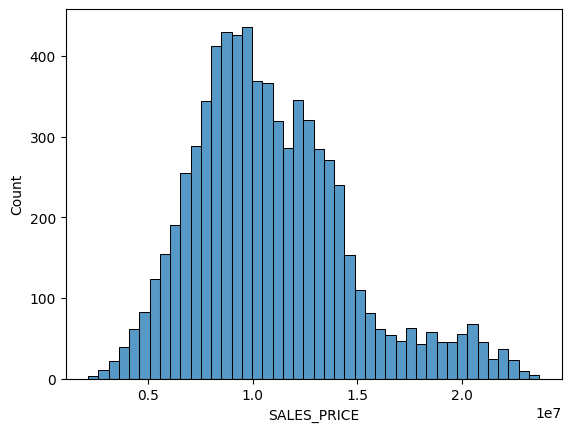

In [10]:
# target variable

sns.histplot(df["SALES_PRICE"])

• The distribution of the target variable is slightly right skewed.

• We can see a small number of houses with a very high price.

<Axes: ylabel='SALES_PRICE'>

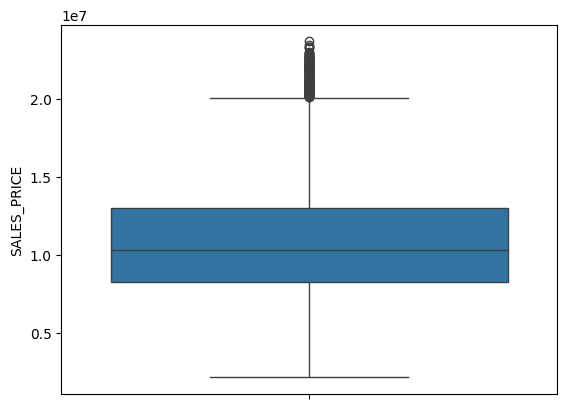

In [11]:
sns.boxplot(df["SALES_PRICE"])

<Axes: ylabel='SALES_PRICE'>

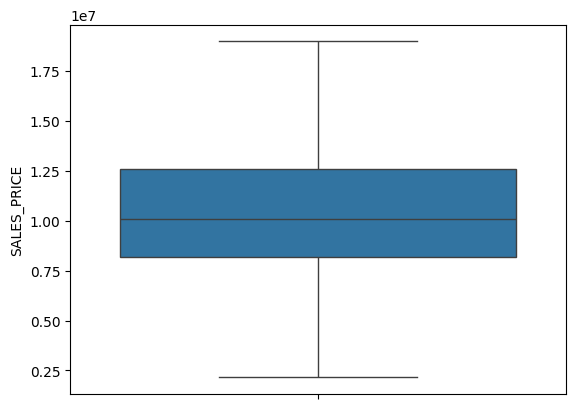

In [12]:
sns.boxplot(df["SALES_PRICE"].loc[df["SALES_PRICE"]<19000000])

<Axes: xlabel='SALES_PRICE', ylabel='Count'>

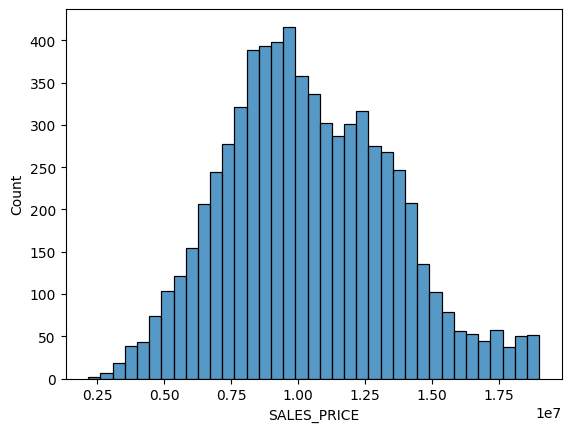

In [13]:
sns.histplot(df["SALES_PRICE"].loc[df["SALES_PRICE"]<19000000])

<Axes: xlabel='INT_SQFT', ylabel='Count'>

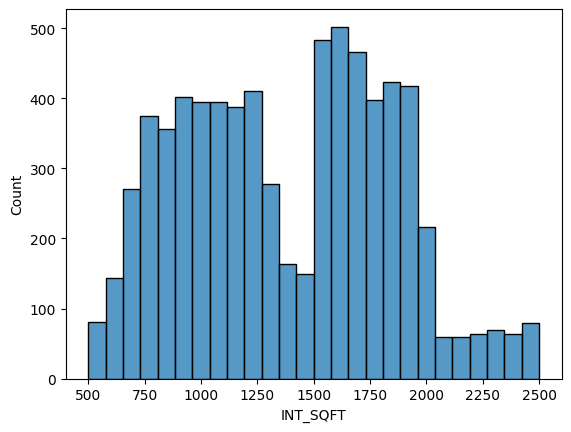

In [14]:
## Area of house in square feet
sns.histplot(df["INT_SQFT"])

<Axes: ylabel='INT_SQFT'>

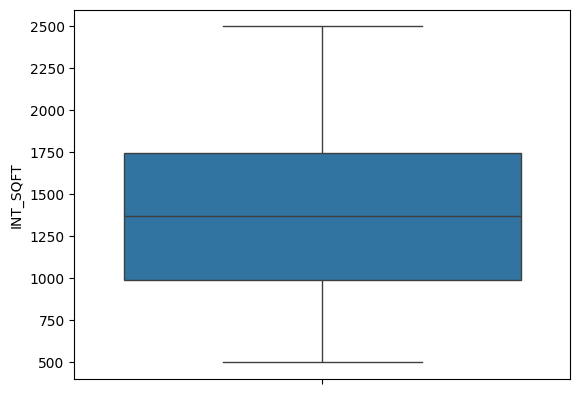

In [15]:
sns.boxplot(df['INT_SQFT'])

• Most houses have the area between 750 sq feet to 1250 sq feet or around 1500 sq feet to 2000 sq feet

• Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

### Value count

In [16]:
df["N_BEDROOM"].value_counts()

N_BEDROOM
1.0    3795
2.0    2352
3.0     707
4.0     254
Name: count, dtype: int64

• It has four different categories

• This variable should be object and not integer

In [17]:
df["N_BEDROOM"].value_counts()/len(df)*100

N_BEDROOM
1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: count, dtype: float64

• About 53% houses have one bedroom

• 33% have 2 bedrooms

• Less than 10% houses have 3 bedrooms

• Only 3.5% have 4 bedrooms

In [18]:
df["N_ROOM"].value_counts()

N_ROOM
4    2563
3    2125
5    1246
2     921
6     254
Name: count, dtype: int64

• The 'Rooms' might have number of kitchen,hall,dinner area ect.

• No house with 1 room, and a very few that have 2

In [19]:
df["N_BATHROOM"].value_counts()/len(df)*100

N_BATHROOM
1.0    78.618652
2.0    21.311014
Name: count, dtype: float64

• 78% houses have 1 bathroom and 21% have 2 bathroom.

• The same can be represented using bar plot.

### Bar plot

<Axes: xlabel='N_BATHROOM', ylabel='count'>

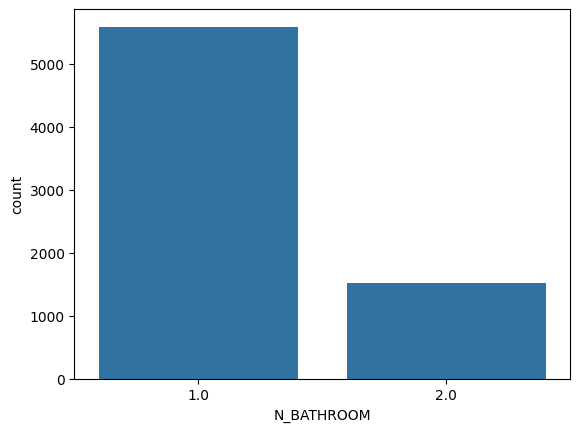

In [20]:
sns.barplot(df["N_BATHROOM"].value_counts())

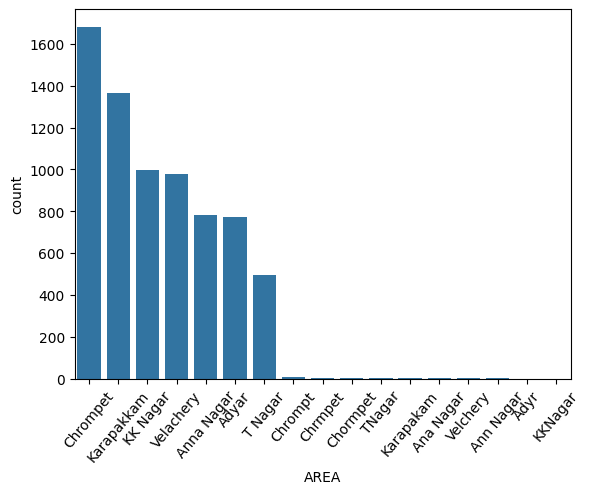

In [21]:
sns.barplot(df["AREA"].value_counts())
plt.xticks(rotation=50)
plt.show()

• There are 17 different categories in the 'AREA' variable

• Only 7 unique area name

• maximum houses are in the area Chrompet, followed by Karapakkam

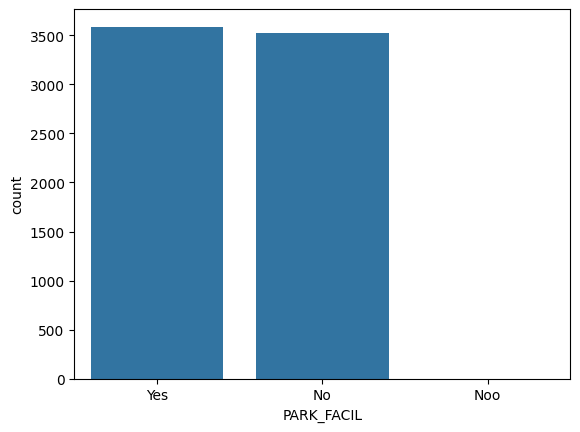

PARK_FACIL
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64

In [22]:
## house with parking facility
sns.barplot(df["PARK_FACIL"].value_counts())
plt.show()
df["PARK_FACIL"].value_counts()

# Data Manipulation

    1. Drop Duplicates (if any)

    2. Fill the missing Values

    3. Correct the data types

    4. Fix the spelling errors in variables





### Drop Duplicates (if any)

In [23]:
df.drop_duplicates()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

In [24]:
df.drop_duplicates().shape

(7109, 22)

In [25]:
df.shape

(7109, 22)

In [26]:
df.drop_duplicates(subset=["AREA"]).shape

(17, 22)

• We have no duplicates. Hence the shape did not change here.

### Missing values

In [27]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

#### Different ways deal with the missing values

• Remove the rows with missing values

• Mean or median in case of continuous variable

• With mode in case of categorical variable

• Using other independent variables

### Drop rows with missing values

In [28]:
df.dropna(axis=1,how='any')

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_ROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131       3   
1     P09411  Anna Nagar      1986  19-12-2006             26       5   
2     P01812       Adyar       909  04-02-2012             70       3   
3     P05346   Velachery      1855  13-03-2010             14       5   
4     P06210  Karapakkam      1226  05-10-2009             84       3   
...      ...         ...       ...         ...            ...     ...   
7104  P03834  Karapakkam       598  03-01-2011             51       2   
7105  P10000   Velachery      1897  08-04-2004             52       5   
7106  P09594   Velachery      1614  25-08-2006            152       4   
7107  P06508  Karapakkam       787  03-08-2009             40       2   
7108  P09794   Velachery      1896  13-07-2005            156       5   

        SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL     STREET  \
0        AbNormal        Yes  15-05-1967  Commercial        AllPub      Paved   
1        AbNormal         No  22-12-1995  Commercial        AllPub     Gravel   
2        AbNormal        Yes  09-02-1992  Commercial           ELO     Gravel   
3          Family         No  18-03-1988      Others       NoSewr       Paved   
4        AbNormal        Yes  13-10-1979      Others        AllPub     Gravel   
...           ...        ...         ...         ...           ...        ...   
7104      AdjLand         No  15-01-1962      Others           ELO  No Access   
7105       Family        Yes  11-04-1995      Others        NoSeWa  No Access   
7106  Normal Sale         No  01-09-1978       House        NoSeWa     Gravel   
7107      Partial        Yes  11-08-1977  Commercial           ELO      Paved   
7108      Partial        Yes  24-07-1961      Others           ELO      Paved   

     MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  REG_FEE  COMMIS  SALES_PRICE  
0         A       4.0          3.9         4.9   380000  144400      7600000  
1        RH       4.9          4.2         2.5   760122  304049     21717770  
2        RL       4.1          3.8         2.2   421094   92114     13159200  
3         I       4.7          3.9         3.6   356321   77042      9630290  
4         C       3.0          2.5         4.1   237000   74063      7406250  
...     ...       ...          ...         ...      ...     ...          ...  
7104     RM       3.0          2.2         2.4   208767  107060      5353000  
7105     RH       3.6          4.5         3.3   346191  205551     10818480  
7106      I       4.3          4.2         2.9   317354  167028      8351410  
7107     RL       4.6          3.8         4.1   425350  119098      8507000  
7108      I       3.1          3.5         4.3   349177   79812      9976480  

[7109 rows x 19 columns]

In [29]:
df.dropna(axis=1,how='any')

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_ROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131       3   
1     P09411  Anna Nagar      1986  19-12-2006             26       5   
2     P01812       Adyar       909  04-02-2012             70       3   
3     P05346   Velachery      1855  13-03-2010             14       5   
4     P06210  Karapakkam      1226  05-10-2009             84       3   
...      ...         ...       ...         ...            ...     ...   
7104  P03834  Karapakkam       598  03-01-2011             51       2   
7105  P10000   Velachery      1897  08-04-2004             52       5   
7106  P09594   Velachery      1614  25-08-2006            152       4   
7107  P06508  Karapakkam       787  03-08-2009             40       2   
7108  P09794   Velachery      1896  13-07-2005            156       5   

        SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL     STREET  \
0        AbNormal        Yes  15-05-1967  Commercial        AllPub      Paved   
1        AbNormal         No  22-12-1995  Commercial        AllPub     Gravel   
2        AbNormal        Yes  09-02-1992  Commercial           ELO     Gravel   
3          Family         No  18-03-1988      Others       NoSewr       Paved   
4        AbNormal        Yes  13-10-1979      Others        AllPub     Gravel   
...           ...        ...         ...         ...           ...        ...   
7104      AdjLand         No  15-01-1962      Others           ELO  No Access   
7105       Family        Yes  11-04-1995      Others        NoSeWa  No Access   
7106  Normal Sale         No  01-09-1978       House        NoSeWa     Gravel   
7107      Partial        Yes  11-08-1977  Commercial           ELO      Paved   
7108      Partial        Yes  24-07-1961      Others           ELO      Paved   

     MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  REG_FEE  COMMIS  SALES_PRICE  
0         A       4.0          3.9         4.9   380000  144400      7600000  
1        RH       4.9          4.2         2.5   760122  304049     21717770  
2        RL       4.1          3.8         2.2   421094   92114     13159200  
3         I       4.7          3.9         3.6   356321   77042      9630290  
4         C       3.0          2.5         4.1   237000   74063      7406250  
...     ...       ...          ...         ...      ...     ...          ...  
7104     RM       3.0          2.2         2.4   208767  107060      5353000  
7105     RH       3.6          4.5         3.3   346191  205551     10818480  
7106      I       4.3          4.2         2.9   317354  167028      8351410  
7107     RL       4.6          3.8         4.1   425350  119098      8507000  
7108      I       3.1          3.5         4.3   349177   79812      9976480  

[7109 rows x 19 columns]

• When axis is set to 1, columns are dropped.

• For given data, 3 columns has missing values hence three columns dropped

• To avoid loss of data, we can use other ways of imputation

#### 4. N_BEDROOM  

In [30]:
df["N_BEDROOM"].mode()[0]

1.0

In [31]:
df["N_BEDROOM"].fillna(value=(df["N_BEDROOM"].mode()[0]),inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\438173334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["N_BEDROOM"].fillna(value=(df["N_BEDROOM"].mode()[0]),inplace=True)


#### 2. N_BATHROOM

In [32]:
df["N_BATHROOM"].mode()

0    1.0
Name: N_BATHROOM, dtype: float64

In [33]:
df["N_BATHROOM"].mode()[0]

1.0

In [34]:
df["N_BATHROOM"].fillna(value=(df["N_BATHROOM"].mode()[0]))

0       1.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
7104    1.0
7105    2.0
7106    1.0
7107    1.0
7108    2.0
Name: N_BATHROOM, Length: 7109, dtype: float64

In [35]:
df.loc[pd.isnull(df["N_BATHROOM"])==True]

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
70    P05304  Anna Nagar      1589  22-03-2010             39        1.0   
5087  P01333    Chrompet      1016  02-08-2012            105        1.0   
6134  P01332    Chormpet       916  02-08-2012            173        1.0   
6371  P01189    Chrompet      1035  06-11-2012             90        1.0   
6535  P09189  Anna Nagar      1864  05-03-2007            184        2.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
70           NaN       4      Partial         No  ...        AllPub   
5087         NaN       3     AbNormal        Yes  ...       NoSewr    
6134         NaN       3  Normal Sale        Yes  ...           ELO   
6371         NaN       3      Partial         No  ...        NoSeWa   
6535         NaN       5       Family        Yes  ...       NoSewr    

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
70       Gravel     RL      2.1         2.5         4.5        3.16   451857   
5087     Gravel     RM      3.2         4.2         2.0        3.24   330086   
6134      Paved     RL      3.4         3.5         3.0         NaN   265423   
6371  No Access     RM      2.3         3.5         3.2        3.05   223403   
6535      Paved     RM      3.3         3.7         4.7        3.96   575606   

      COMMIS  SALES_PRICE  
70     85486     12212350  
5087  106479     10647920  
6134   44237      8847420  
6371   24823      8274200  
6535  124455     15556920  

[5 rows x 22 columns]

In [36]:
for i in range(len(df)):
    if df["N_BEDROOM"][i]==1.0:
        df["N_BATHROOM"][i]=1.0
    else:
        df["N_BATHROOM"][i]=2.0
    

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=1.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=2.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=1.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=1.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=2.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_BATHROOM"][i]=1.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=1.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=1.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:3: SettingWithCopyWarning: 
A value is try

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["N_BATHROOM"][i]=2.0
C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4199496889.py:5: SettingWithCopyWarning: 
A value is try

In [37]:
df.loc[pd.isnull(df["N_BATHROOM"]==True)]

Empty DataFrame
Columns: [PRT_ID, AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []

[0 rows x 22 columns]

#### 3.QS_OVERALL

In [38]:
df[["QS_ROOMS","QS_BATHROOM",'QS_BEDROOM',"QS_OVERALL"]].head(10)

QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL
0       4.0          3.9         4.9       4.330
1       4.9          4.2         2.5       3.765
2       4.1          3.8         2.2       3.090
3       4.7          3.9         3.6       4.010
4       3.0          2.5         4.1       3.290
5       4.5          2.6         3.1       3.320
6       3.6          2.1         2.5       2.670
7       2.4          4.5         2.1       3.260
8       2.9          3.7         4.0       3.550
9       3.1          3.1         3.3       3.160

In [39]:
temp=(df['QS_BATHROOM']+df["QS_BEDROOM"]+df["QS_ROOMS"])/3
pd.concat([df['QS_BATHROOM'],df["QS_BEDROOM"],df["QS_ROOMS"],temp],axis=1).head()

QS_BATHROOM  QS_BEDROOM  QS_ROOMS         0
0          3.9         4.9       4.0  4.266667
1          4.2         2.5       4.9  3.866667
2          3.8         2.2       4.1  3.366667
3          3.9         3.6       4.7  4.066667
4          2.5         4.1       3.0  3.200000


Importing missing values with the help of other 'quality score' columns

Additionally we can assign higher weights to n_bedroom and n_bathroom

In [40]:
df.loc[pd.isnull(df["QS_OVERALL"])==True]

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
15    P06328   Velachery      1868  12-09-2009            148        3.0   
46    P09483     T Nagar      1882  18-11-2006            189        2.0   
86    P00545    Chrompet      1085  19-01-2014            149        1.0   
111   P06768       Adyar      1034  30-05-2009             73        1.0   
134   P00089     T Nagar      1942  20-12-2014             10        2.0   
143   P06226  Karapakkam      1430  02-10-2009             17        2.0   
161   P06964   Velachery      1824  03-04-2009            187        3.0   
186   P08752       Adyar       738  02-09-2007             69        1.0   
208   P03292  Karapakkam      1578  18-04-2011            153        2.0   
248   P04891   Velachery      1776  09-06-2010            120        2.0   
261   P04590       Adyar      1249  04-08-2010             93        2.0   
284   P03587    KK Nagar      1632  22-02-2011            156        2.0   
312   P02964    KK Nagar      2078  22-06-2011             13        3.0   
329   P01156  Anna Nagar      1585  25-11-2012            188        1.0   
355   P03358    KK Nagar      1484  09-04-2011             54        2.0   
402   P04597  Karapakkam      1353  03-08-2010             20        2.0   
437   P04897    KK Nagar      1450  09-06-2010            169        2.0   
479   P04286  Karapakkam       984  30-09-2010            183        1.0   
513   P08647  Anna Nagar      1898  09-10-2007            111        2.0   
624   P02141  Karapakkam      1352  01-12-2011            171        2.0   
625   P02698  Anna Nagar      1510  15-08-2011            196        1.0   
714   P03730  Anna Nagar      1914  23-01-2011             66        2.0   
769   P01445    Chrompet       944  02-05-2012            132        1.0   
822   P04352    Chrompet      1258  17-09-2010             78        2.0   
899   P02853    KK Nagar      1532  12-07-2011             60        2.0   
955   P02506    Chrompet       976  21-09-2011             64        1.0   
993   P08954     T Nagar      1519  06-06-2007            115        1.0   
1044  P03792    KK Nagar      1896  10-01-2011            182        3.0   
1142  P07495    KK Nagar      2434  23-10-2008             28        4.0   
1206  P09213  Anna Nagar      1952  23-02-2007             53        2.0   
1393  P00225  Anna Nagar      2000  09-09-2014            102        2.0   
1447  P05466    Chrompet      1171  19-02-2010             10        1.0   
1528  P01678  Anna Nagar      1823  27-02-2012             45        2.0   
2196  P03342     T Nagar      1639  11-04-2011             42        1.0   
2227  P08462    Chrompet      1196  24-12-2007            116        1.0   
2228  P08971    Chrompet      1225  30-05-2007             85        2.0   
2336  P03084   Velachery      1596  29-05-2011             99        2.0   
3870  P02851   Velachery      1752  12-07-2011             70        2.0   
4329  P00239  Anna Nagar      1838  31-08-2014            148        2.0   
4836  P05101   Velachery      1662  01-05-2010             50        2.0   
5104  P08589    Chrompet      1022  28-10-2007            170        1.0   
5458  P02849     T Nagar      1624  13-07-2011            117        1.0   
5463  P09431       Adyar      1277  10-12-2006             30        2.0   
6111  P06239  Karapakkam       806  30-09-2009             54        1.0   
6134  P01332    Chormpet       916  02-08-2012            173        1.0   
6161  P02241       Adyar      1150  08-11-2011            170        1.0   
6248  P03983  Karapakkam       931  30-11-2010             86        1.0   
6855  P09225     T Nagar      1741  20-02-2007            106        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
15           2.0       5       Family         No  ...       NoSewr    
46           2.0       5     AbNormal        Yes  ...           ELO   
86           1.0       3     AbNormal        Yes  ...       NoSewr  

In [41]:
for i in range(len(df)):
    if pd.isnull(df["QS_OVERALL"][i])==True:
        df["QS_OVERALL"][i]=(df['QS_BATHROOM'][i]+df["QS_BEDROOM"][i]+df["QS_ROOMS"][i])/3

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\4074213339.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["QS_OVERALL"][i]=(df['QS_BATHROOM'][i]+df["QS_BEDROOM"][i]+df["QS_ROOMS"][i])/3
C:\Users\mohit\AppData\Local\Temp\ipykernel_31

In [42]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

## Data types

In [43]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [44]:
df=df.astype({'N_BEDROOM':'object','N_ROOM':'object','N_BATHROOM':'object'})

In [45]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [46]:
for i in df.columns:
    print("-------------value count in ",i,"---------------")
    print(df[i].value_counts())
    print(end="\n\n")

-------------value count in  PRT_ID ---------------
PRT_ID
P03210    1
P01175    1
P07437    1
P06628    1
P02767    1
         ..
P01279    1
P00654    1
P03895    1
P02662    1
P09794    1
Name: count, Length: 7109, dtype: int64


-------------value count in  AREA ---------------
AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64


-------------value count in  INT_SQFT ---------------
INT_SQFT
1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: count, Length: 1699, dtype: int64


-------------value count in  DATE_SALE ---------------
DATE_SALE
06-10-2009    12
06-01-2009    10
12-04-2011    10
26-02-2012    10
17

#### update name in columns 

##### AREA

In [47]:
df["AREA"].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',
                    'Karapakam':'Karapakkam',
                    'KKNagar':'KK Nagar',
                   'Velchery':'Velachery',
                    'Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
                   'Adyr':'Adyar',
                   'TNagar':'T Nagar'},inplace=True)
df["AREA"].value_counts()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\3281310894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AREA"].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',


AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

#### SALE_COND

In [48]:
df["SALE_COND"].replace({'Adj Land':'AdjLand',
                        'Ab Normal':'AbNormal'
                       ,'Partiall':'Partial','PartiaLl':'Partial'},inplace=True)
df["SALE_COND"].value_counts()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\3610812471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SALE_COND"].replace({'Adj Land':'AdjLand',


SALE_COND
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

#### PARK_FACIL

In [49]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\127037179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)


PARK_FACIL
Yes    3587
No     3522
Name: count, dtype: int64

#### BUILDTYPE

In [50]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)
df['BUILDTYPE'].value_counts()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\3025985317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)


BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

#### UTILITY_AVAIL


In [51]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)
df['UTILITY_AVAIL'].value_counts()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\2060422893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)


UTILITY_AVAIL
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: count, dtype: int64

#### STREET

In [52]:
df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'},inplace=True)
df['STREET'].value_counts()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3128\1156871433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'},inplace=True)


STREET
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

In [53]:
for i in df.columns:
    print("-------------value count in ",i,"---------------")
    print(df[i].value_counts())
    print(end="\n\n")

-------------value count in  PRT_ID ---------------
PRT_ID
P03210    1
P01175    1
P07437    1
P06628    1
P02767    1
         ..
P01279    1
P00654    1
P03895    1
P02662    1
P09794    1
Name: count, Length: 7109, dtype: int64


-------------value count in  AREA ---------------
AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64


-------------value count in  INT_SQFT ---------------
INT_SQFT
1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: count, Length: 1699, dtype: int64


-------------value count in  DATE_SALE ---------------
DATE_SALE
06-10-2009    12
06-01-2009    10
12-04-2011    10
26-02-2012    10
17-11-2010    10
              ..
21-12-2014     1
29-06-2004     1
27-08-2004     1
03-05-2012     1
13-07-2005     1
Name: count, Length: 2798, dtype: int64


-------------value count in  DI

# BIVARIATE ANALYSIS

## House Features

    • INT_SQFT-The interior Sq. Ft of the property

    • N_BEDROOM-The number of Bed rooms

    • N_BATHROOM The number of bathrooms

    • N_ROOM-Total Number of Rooms

    • QS_ROOMS-The quality score assigned for rooms based on buyer reviews

    • QS BATHROOM-The quality score assigned for bathroom based on buyer reviews

    • QS_BEDROOM-The quality score assigned for bedroom based on buyer reviews

    • QS_OVERALL -The Overall quality score assigned for the property

    • SALE COND-The Sale Condition

        ■ Normal: Normal Sale

        ■ Abnorml: Abnormal Sale trade, foreclosure, short sale

        ■ AdjLand: Adjoining Land Purchase

        ■ Family: Sale between family members

        ■ Partial: Home was not completed when last assessed

    • BUILDTYPE-The type of building

        ■ House

        ■ Commercial

        ■ Others

## Surrounding and Locality

    • AREA - The property in which the real estate is located

    • DIST_MAINROAD - The distance of the property to the main road

    • PARK_FACIL - Whether parking facility is available

    • UTILITY_AVAIL

        ■ AllPub: All public Utilities (E,G,W,& S)

        ■ NoSewr: Electricity, Gas, and Water (Septic Tank)

        ■ NoSeWa: Electricity and Gas Only

        ■ ELO: Electricity only

    • STREET

        ■ Gravel

        ■ Paved

        ■ TNO ACCess

    • MZZONE
        ■ A: Agriculture

        ■ C: Commercial

        ■ I: Industrial

        ■ RH: Residential High Density

        ■ RL: Residential Low Density

        ■ RM: Residential Medium Density

## House Sale Price

    • PRT_ID-The Property Transaction ID assigned by ChennaiEstate

    • COMMISI- The Commission paid to the agent

    • SALES_PRICE - The total sale price of the property
    

In [54]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

## Hypothesis -

• Sales price should increase with increase in interior square feet

• The sales price would depend on the area where house is located

• Higher the number of rooms, bathrooms in the house, more should be the price

### 1. House Features

INT_SQFT-The interior Sq. Ft of the property

• N_BEDROOM - The number of Bed rooms

• N_BATHROOM - The number of bathrooms

• N_ROOM-Total Number of Rooms

• QS_ROOMS - The quality score assigned for rooms based on buyer reviews

• QS_BATHROOM - The quality score assigned for bathroom based on buyer reviews

• QS_BEDROOM - The quality score assigned for bedroom based on buyer reviews

• QS_OVERALL - The Overall quality score assigned for the property

• SALE_COND - The Sale Condition

• BUILDTYPE - The type of building

##### 1. Interior area and sales price (target)


<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

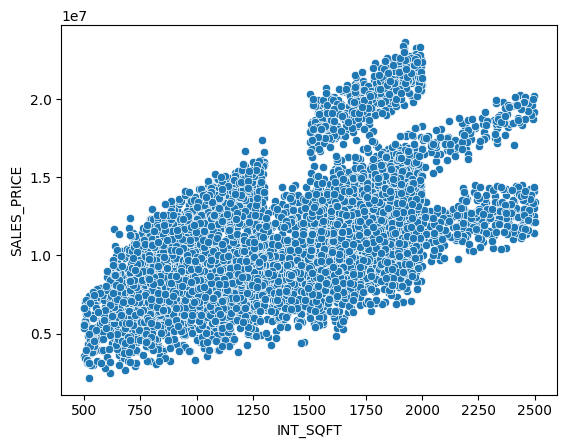

In [55]:
sns.scatterplot(data=df,x='INT_SQFT',y='SALES_PRICE')

• A very clear linear relationship can be seen between the interior area and sales price

• These variables have a positive correlation

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

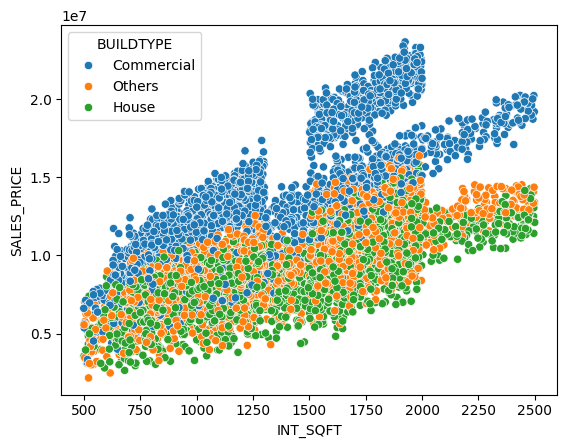

In [56]:
sns.scatterplot(data=df,x='INT_SQFT',y='SALES_PRICE',hue='BUILDTYPE')

##### 2. Sales price against no of bedroom and bedroom

In [57]:
df.groupby(['N_BEDROOM','N_BATHROOM']).agg({'SALES_PRICE':'median'})

SALES_PRICE
N_BEDROOM N_BATHROOM             
1.0       1.0           9168740.0
2.0       2.0          10995020.0
3.0       2.0          11663490.0
4.0       2.0          13172000.0

In [58]:
# sale price of house wrt no. of bedroom and bathroom
df.pivot_table('SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='mean')

N_BATHROOM           1.0           2.0
N_BEDROOM                             
1.0         9.790449e+06           NaN
2.0                  NaN  1.181747e+07
3.0                  NaN  1.247813e+07
4.0                  NaN  1.445131e+07

In [59]:
df.pivot_table(values='SALES_PRICE',index='N_BATHROOM',columns='N_BEDROOM',aggfunc='median')

N_BEDROOM         1.0         2.0         3.0         4.0
N_BATHROOM                                               
1.0         9168740.0         NaN         NaN         NaN
2.0               NaN  10995020.0  11663490.0  13172000.0

##### 3.OS_OVERALL and sales price

<Axes: xlabel='SALES_PRICE', ylabel='QS_OVERALL'>

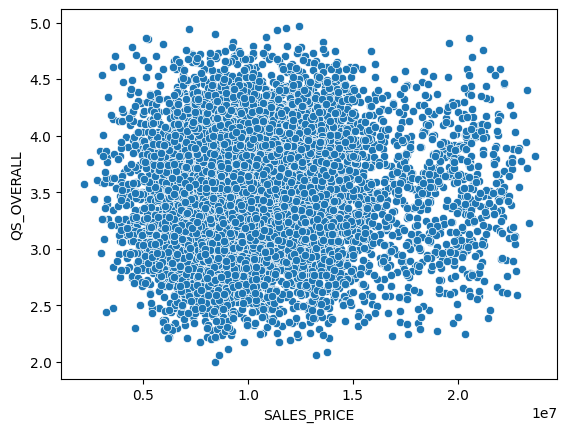

In [60]:
sns.scatterplot(data=df,x='SALES_PRICE',y='QS_OVERALL')

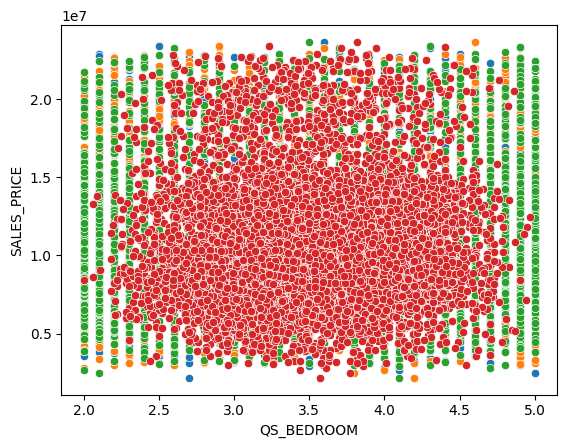

In [61]:
sns.scatterplot(df,x='QS_BEDROOM',y='SALES_PRICE')
sns.scatterplot(df,x='QS_BATHROOM',y='SALES_PRICE')
sns.scatterplot(df,x='QS_ROOMS',y='SALES_PRICE')
sns.scatterplot(df,x='QS_OVERALL',y='SALES_PRICE')
plt.show()


Text(0.5, 0.98, 'SALES_PRICE')

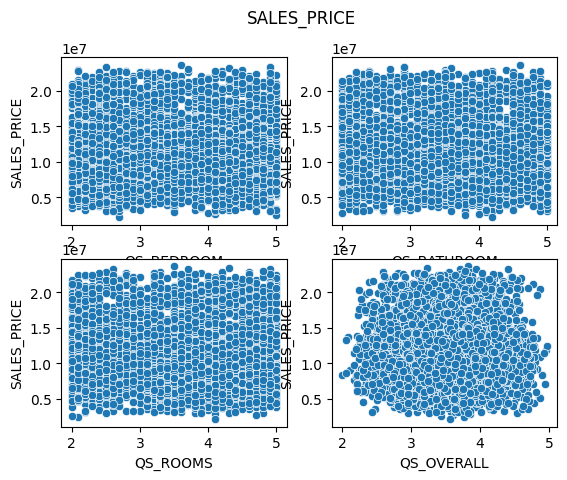

In [62]:
plt.subplot(2,2,1)
sns.scatterplot(df,x='QS_BEDROOM',y='SALES_PRICE')
plt.subplot(2,2,2)
sns.scatterplot(df,x='QS_BATHROOM',y='SALES_PRICE')

plt.subplot(2,2,3)
sns.scatterplot(df,x='QS_ROOMS',y='SALES_PRICE')

plt.subplot(2,2,4)
sns.scatterplot(df,x='QS_OVERALL',y='SALES_PRICE')
plt.suptitle('SALES_PRICE')

Text(0.5, 0.98, 'SALES_PRICE')

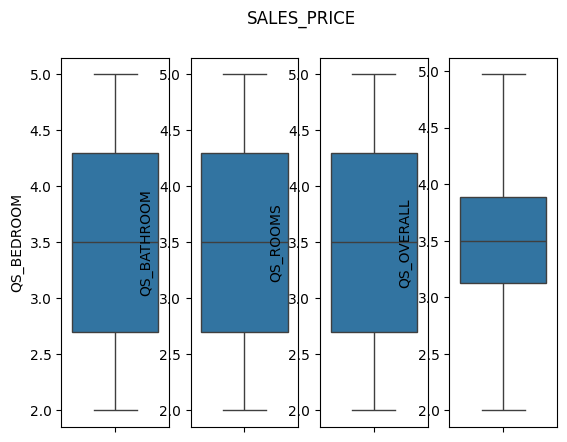

In [63]:
plt.subplot(1,4,1)
sns.boxplot(df['QS_BEDROOM'])
plt.subplot(1,4,2)
sns.boxplot(df['QS_BATHROOM'])

plt.subplot(1,4,3)
sns.boxplot(df['QS_ROOMS'])

plt.subplot(1,4,4)
sns.boxplot(df['QS_OVERALL'])
plt.suptitle('SALES_PRICE')